In [1]:
import tensorflow_io as tfio

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import tensorflow_io as tfio


2022-01-02 12:51:24.530491: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-02 12:51:24.530550: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [20]:
!pip install tensorflow
#pip install tensorflow_io

In [2]:
!ls


rsna-miccai-brain-tumor-radiogenomic-classification_2.zip  train
sample_submission.csv					   train_labels.csv
test							   Untitled.ipynb


In [4]:
train = os.listdir("train/")
test=os.listdir("test/")
f=os.listdir("train/00000/FLAIR/")
t1=os.listdir("train/00000/T1w/")
t2=os.listdir("train/00000/T2w/")
tw=os.listdir("train/00000/T1wCE/")

In [5]:
len(t1)

33

In [6]:
len(t2)

408

In [7]:
df = pd.read_csv("train_labels.csv")

In [8]:
df.head()

BraTS21ID  MGMT_value
0          0           1
1          2           1
2          3           0
3          5           1
4          6           1

In [8]:
len(df)

585

In [17]:
train

['00000',
 '00002',
 '00003',
 '00005',
 '00006',
 '00008',
 '00009',
 '00011',
 '00012',
 '00014',
 '00017',
 '00018',
 '00019',
 '00020',
 '00021',
 '00022',
 '00024',
 '00025',
 '00026',
 '00028',
 '00031',
 '00032',
 '00033',
 '00035',
 '00036',
 '00043',
 '00044',
 '00045',
 '00046',
 '00048',
 '00049',
 '00052',
 '00053',
 '00054',
 '00056',
 '00058',
 '00059',
 '00060',
 '00061',
 '00062',
 '00064',
 '00066',
 '00068',
 '00070',
 '00071',
 '00072',
 '00074',
 '00077',
 '00078',
 '00081',
 '00084',
 '00085',
 '00087',
 '00088',
 '00089',
 '00090',
 '00094',
 '00095',
 '00096',
 '00097',
 '00099',
 '00100',
 '00102',
 '00104',
 '00105',
 '00106',
 '00107',
 '00108',
 '00109',
 '00110',
 '00111',
 '00112',
 '00113',
 '00116',
 '00117',
 '00120',
 '00121',
 '00122',
 '00123',
 '00124',
 '00130',
 '00132',
 '00133',
 '00134',
 '00136',
 '00137',
 '00138',
 '00139',
 '00140',
 '00142',
 '00143',
 '00144',
 '00146',
 '00147',
 '00148',
 '00149',
 '00150',
 '00151',
 '00154',
 '00155',


In [9]:
train_id= [int(item) for item in train]

In [5]:
train_id

[0,
 2,
 3,
 5,
 6,
 8,
 9,
 11,
 12,
 14,
 17,
 18,
 19,
 20,
 21,
 22,
 24,
 25,
 26,
 28,
 31,
 32,
 33,
 35,
 36,
 43,
 44,
 45,
 46,
 48,
 49,
 52,
 53,
 54,
 56,
 58,
 59,
 60,
 61,
 62,
 64,
 66,
 68,
 70,
 71,
 72,
 74,
 77,
 78,
 81,
 84,
 85,
 87,
 88,
 89,
 90,
 94,
 95,
 96,
 97,
 99,
 100,
 102,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 116,
 117,
 120,
 121,
 122,
 123,
 124,
 130,
 132,
 133,
 134,
 136,
 137,
 138,
 139,
 140,
 142,
 143,
 144,
 146,
 147,
 148,
 149,
 150,
 151,
 154,
 155,
 157,
 158,
 159,
 160,
 162,
 165,
 166,
 167,
 169,
 170,
 171,
 172,
 176,
 177,
 178,
 183,
 184,
 185,
 186,
 187,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 199,
 201,
 203,
 204,
 206,
 209,
 210,
 211,
 212,
 214,
 216,
 217,
 218,
 220,
 221,
 222,
 227,
 228,
 230,
 231,
 233,
 234,
 235,
 236,
 237,
 238,
 239,
 240,
 241,
 242,
 243,
 245,
 246,
 30,
 63,
 98,
 128,
 156,
 188,
 219,
 247,
 281,
 306,
 334,
 367,
 399,
 425,
 457,
 498,
 525,
 554,
 57

2022-01-02 12:53:12.317336: I tensorflow_io/core/kernels/cpu_check.cc:128] Your CPU supports instructions that this TensorFlow IO binary was not compiled to use: AVX2 FMA
W: DcmMetaInfo: No Group Length available in Meta Information Header
W: processing MR image ... applying modality transform may create unexpected result
W: DcmMetaInfo: No Group Length available in Meta Information Header
W: processing MR image ... applying modality transform may create unexpected result
W: DcmMetaInfo: No Group Length available in Meta Information Header
W: processing MR image ... applying modality transform may create unexpected result
W: DcmMetaInfo: No Group Length available in Meta Information Header
W: processing MR image ... applying modality transform may create unexpected result
W: DcmMetaInfo: No Group Length available in Meta Information Header
W: processing MR image ... applying modality transform may create unexpected result
W: DcmMetaInfo: No Group Length available in Meta Information He

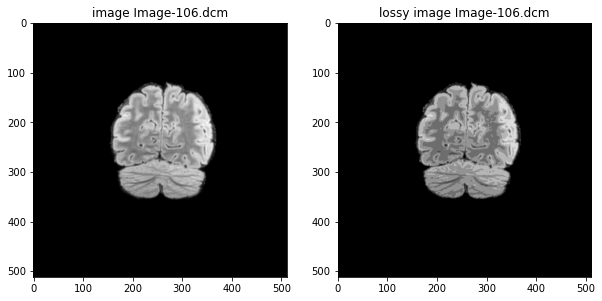

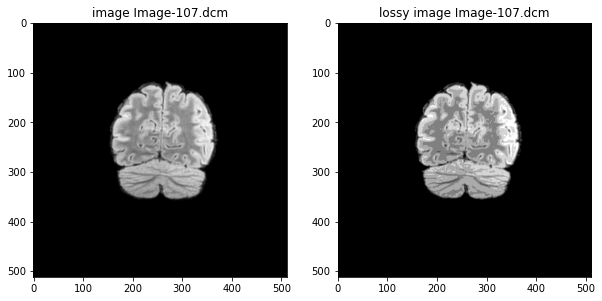

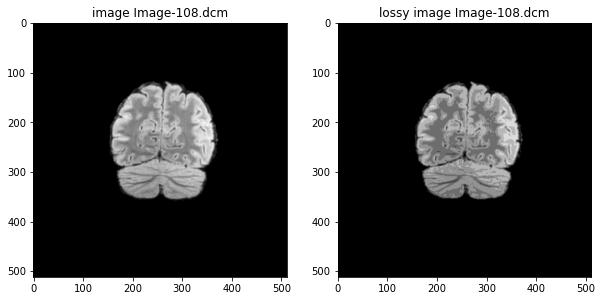

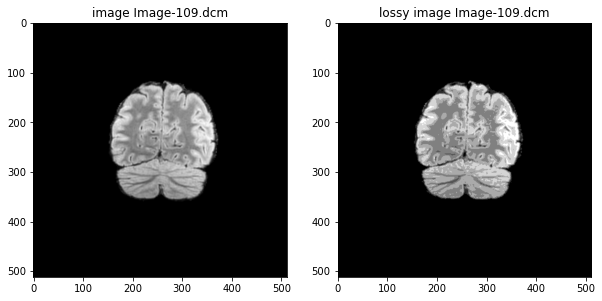

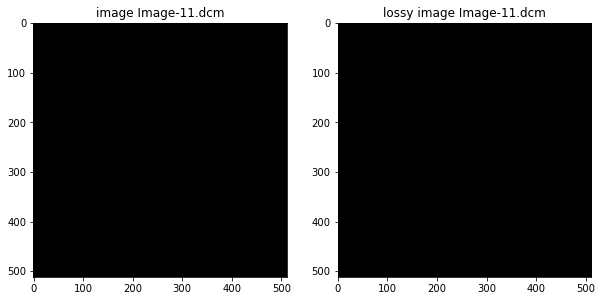

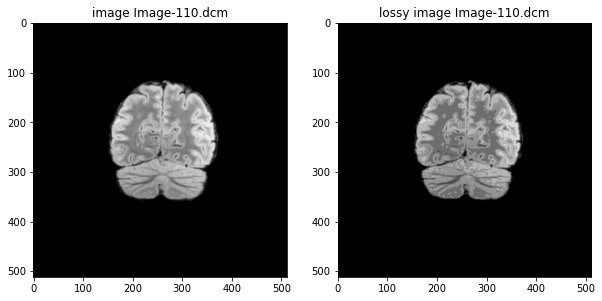

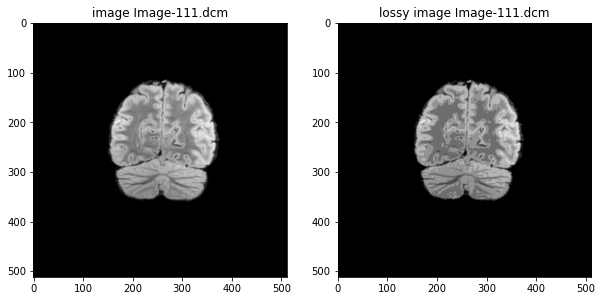

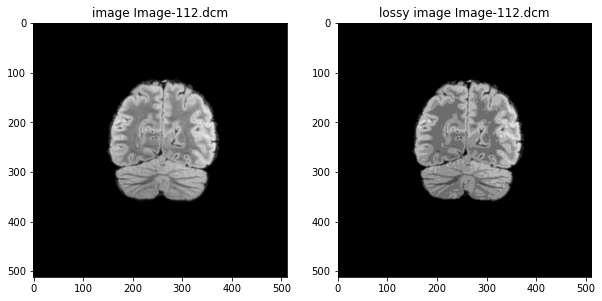

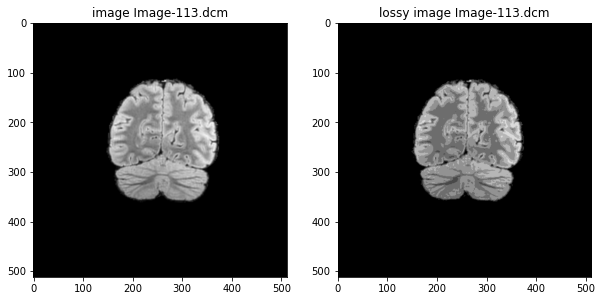

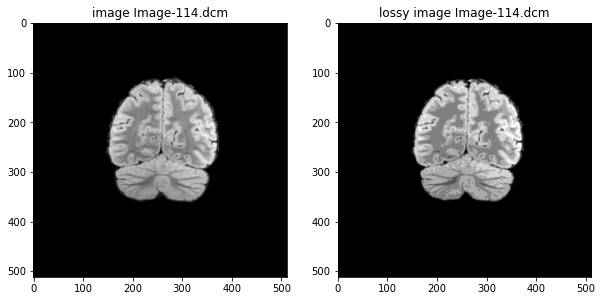

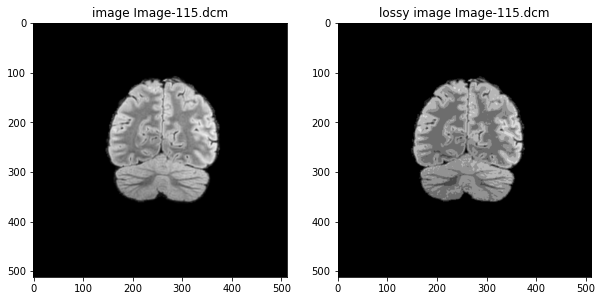

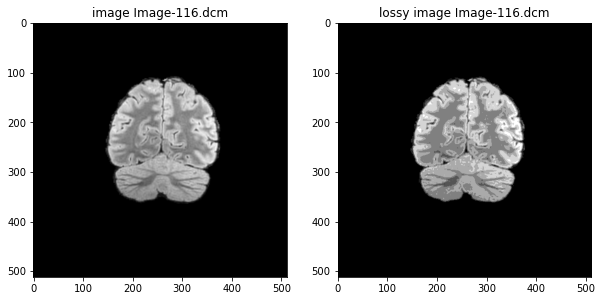

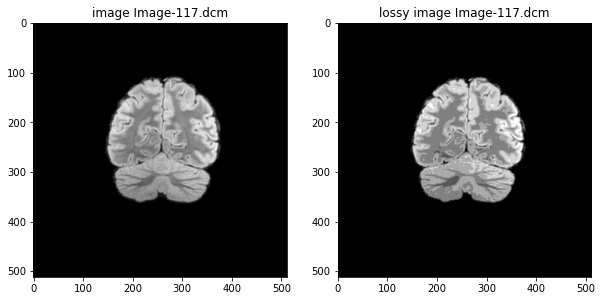

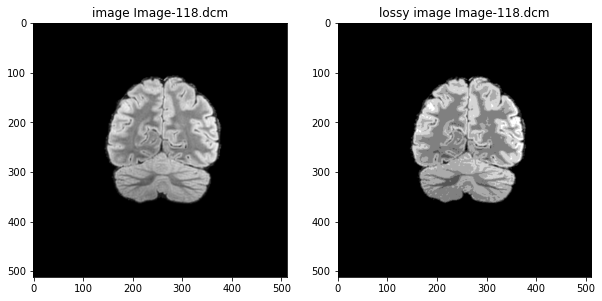

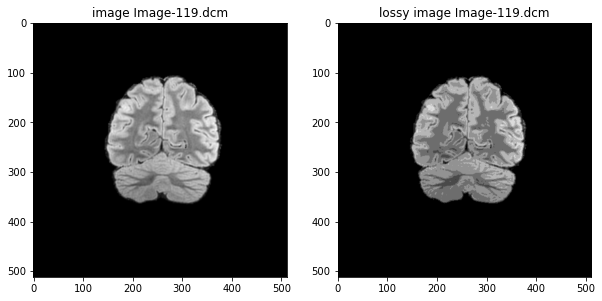

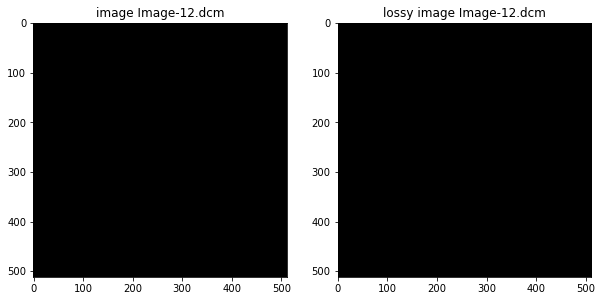

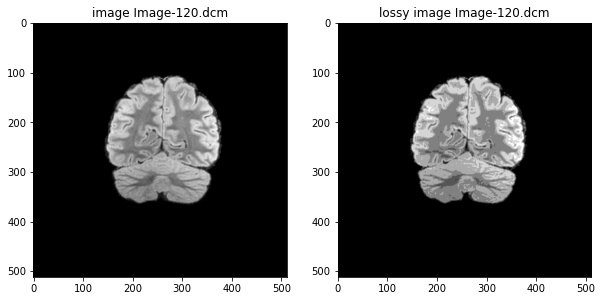

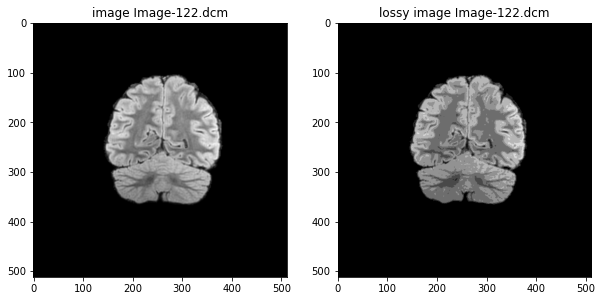

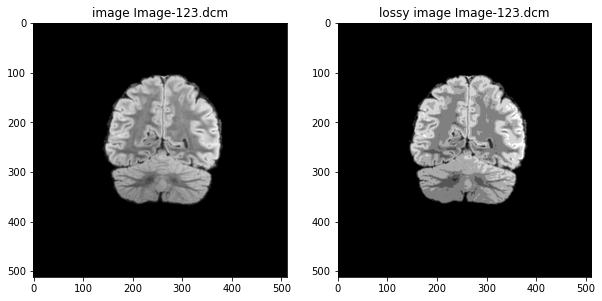

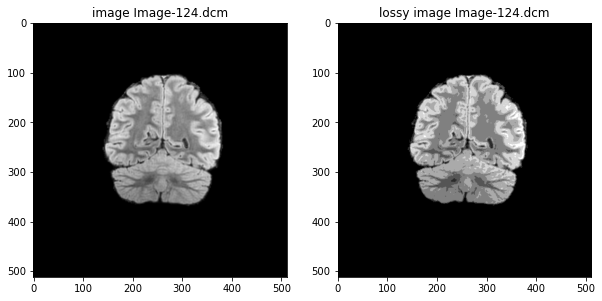

In [11]:
for i in range(20):

    image_bytes = tf.io.read_file('train/00000/FLAIR/' + f[i])

    image = tfio.image.decode_dicom_image(image_bytes, dtype=tf.uint16)

    skipped = tfio.image.decode_dicom_image(image_bytes, on_error='skip', dtype=tf.uint8)

    lossy_image = tfio.image.decode_dicom_image(image_bytes, scale='auto', on_error='lossy', dtype=tf.uint8)


    fig, axes = plt.subplots(1,2, figsize=(10,10))
    axes[0].imshow(np.squeeze(image.numpy()), cmap='gray')
    axes[0].set_title('image '+f[i])
    axes[1].imshow(np.squeeze(lossy_image.numpy()), cmap='gray')
    axes[1].set_title('lossy image '+f[i]);

In [12]:
image_bytes=[]
image=[]
def load_image(data):
    global image_bytes
    global image
    image_bytes = tf.io.read_file('train/00000/FLAIR/' + data)

    image = tfio.image.decode_dicom_image(image_bytes, dtype=tf.uint16)

    skipped = tfio.image.decode_dicom_image(image_bytes, on_error='skip', dtype=tf.uint8)

    lossy_image = tfio.image.decode_dicom_image(image_bytes, scale='auto', on_error='lossy', dtype=tf.uint8)


    fig, axes = plt.subplots(1,2, figsize=(10,10))
    axes[0].imshow(np.squeeze(image.numpy()), cmap='gray')
    axes[0].set_title('image '+data)
    axes[1].imshow(np.squeeze(lossy_image.numpy()), cmap='gray')
    axes[1].set_title('lossy image '+data);

W: DcmMetaInfo: No Group Length available in Meta Information Header
W: processing MR image ... applying modality transform may create unexpected result
W: DcmMetaInfo: No Group Length available in Meta Information Header
W: processing MR image ... applying modality transform may create unexpected result
W: DcmMetaInfo: No Group Length available in Meta Information Header
W: processing MR image ... applying modality transform may create unexpected result


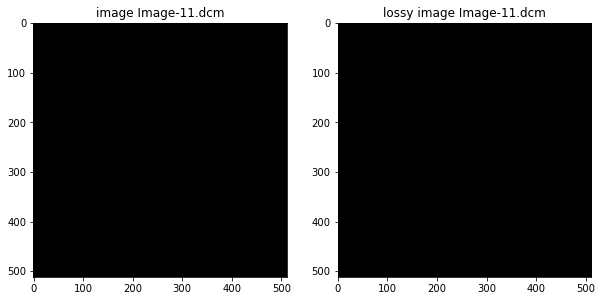

In [13]:
load_image("Image-11.dcm")

In [9]:
image_bytes

<tf.Tensor: shape=(), dtype=string, numpy=b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00DICM\x02\x00\x10\x00UI\x12\x001.2.840.10008.1.2\x00\x08\x00\x05\x00\n\x00\x00\x00ISO_IR 100\x08\x00\x08\x00\x12\x00\x00\x00DERIVED\\SECONDARY \x08\x00\x16\x00\x1a\x00\x00\x001.2.840.10008.5.1.4.1.1.4\x00\x08\x00\x18\x00@\x00\x00\x001.2.826.0.1.3680043.8.498.11412755182553369095697925171139093030\x08\x00P\x00\x06\x00\x00\x0000000 \x08\x00`\x00\x02\x00\x00\x00MR\x08\x00>\x10\x06\x00\x00\x00FLAIR \x10\x00\x10\x00\x06\x00\x00\x0000000 \x10\x00 

In [10]:
 (ax1, ax2)def load_images(path,data,end,start=0):
    for i in range(20):

        image_bytes = tf.io.read_file(path+ "/"+ data[i])

        image = tfio.image.decode_dicom_image(image_bytes, dtype=tf.uint16)

        skipped = tfio.image.decode_dicom_image(image_bytes, on_error='lossy', dtype=tf.uint8)

        lossy_image = tfio.image.decode_dicom_image(image_bytes, scale='auto', on_error='lossy', dtype=tf.uint8)


        fig, axes = plt.subplots(1,3, figsize=(10,10))
        axes[0].imshow(np.squeeze(image.numpy()), cmap='gray')
        axes[0].set_title('image '+data[i])
        axes[1].imshow(np.squeeze(lossy_image.numpy()), cmap='gray')
        axes[1].set_title('lossy image '+data[i]);
        axes[2].imshow(np.squeeze(skipped.numpy()), cmap='gray')

In [11]:
import os

In [12]:
t1 = os.listdir('train/00000/T1w/')

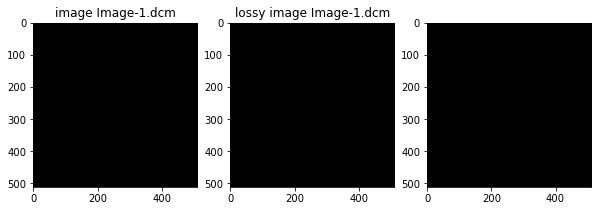

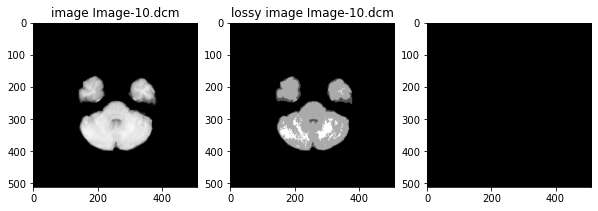

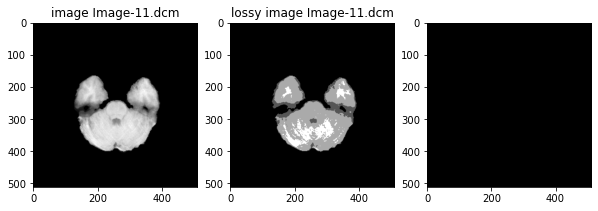

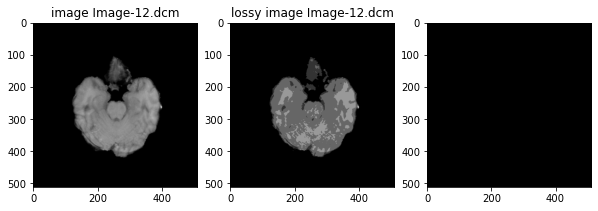

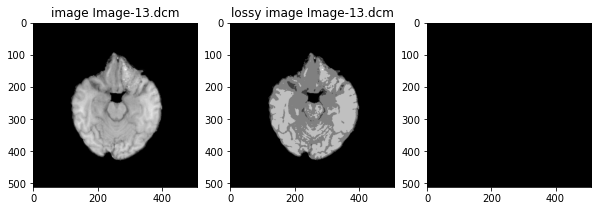

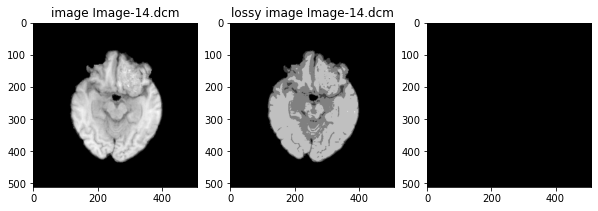

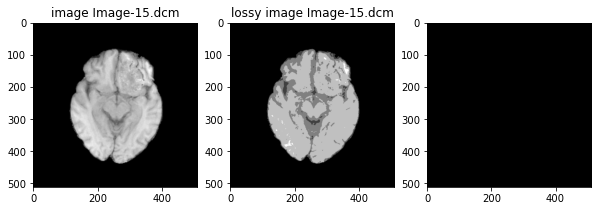

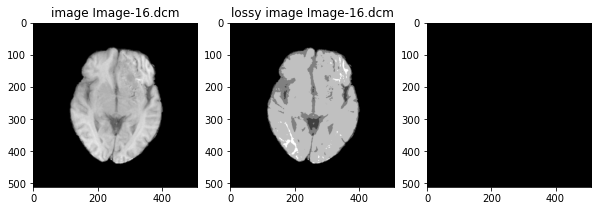

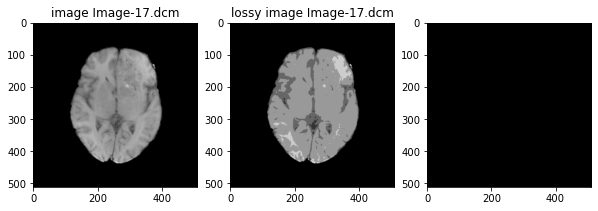

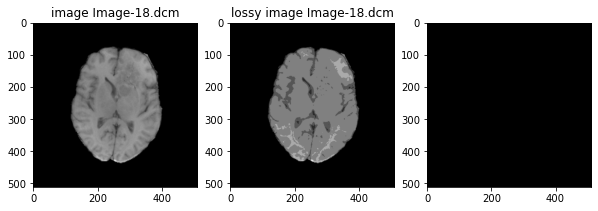

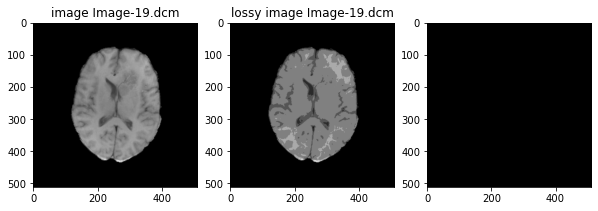

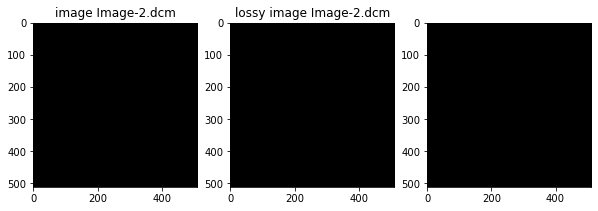

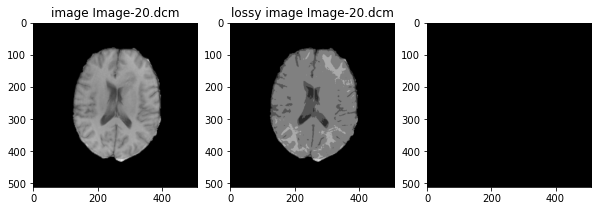

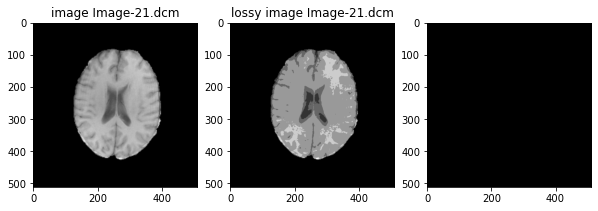

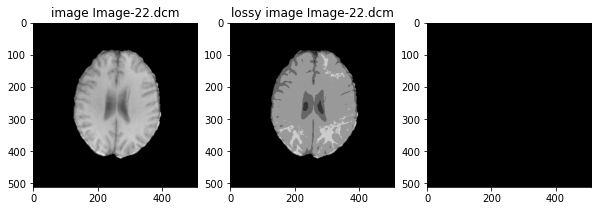

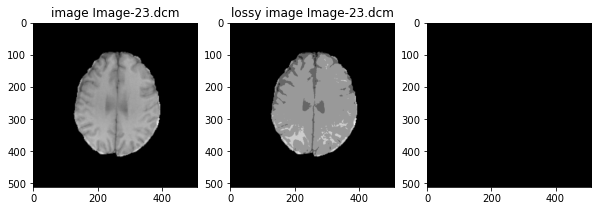

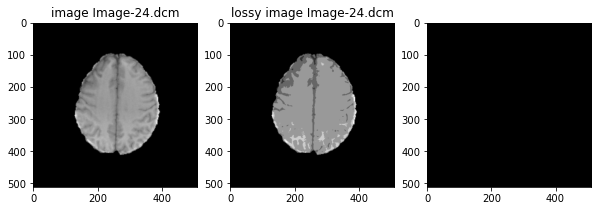

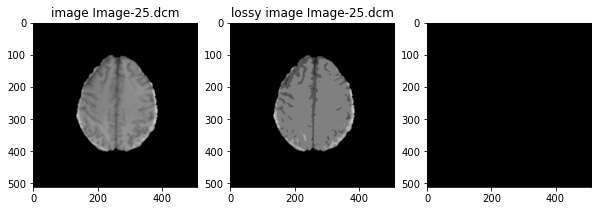

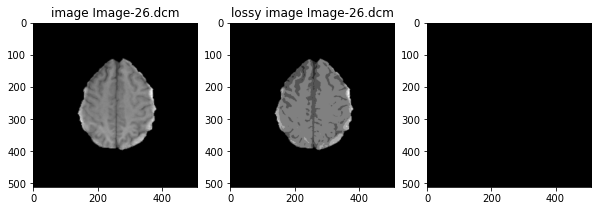

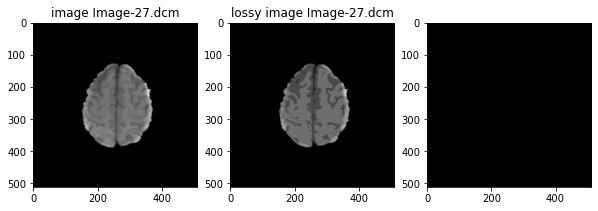

In [13]:
load_images('train/00000/T1w',t1,2)

In [14]:
t2 = os.listdir('train/00000/T2w/')
tc = os.listdir('train/00000/T1wCE/')

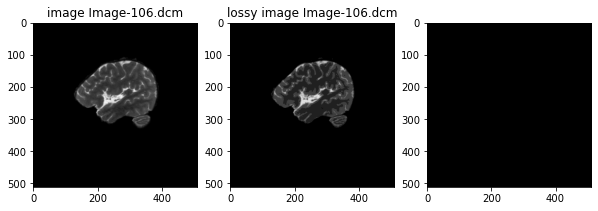

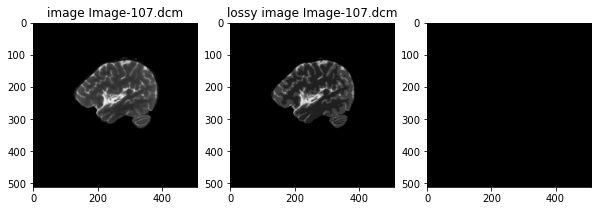

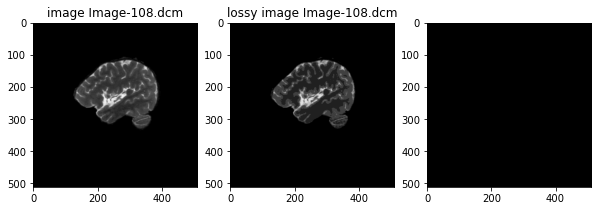

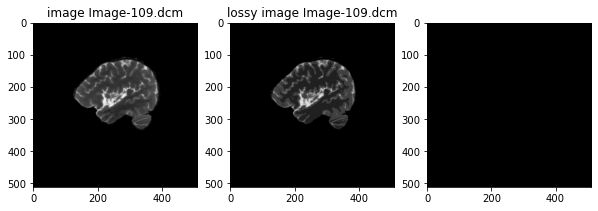

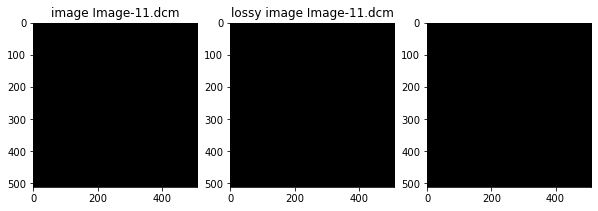

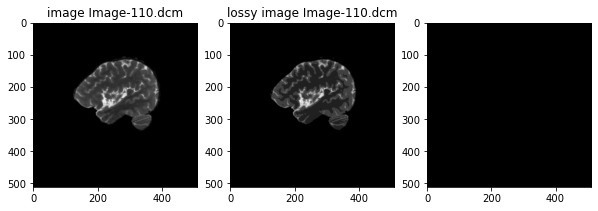

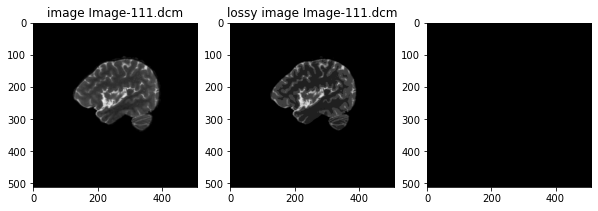

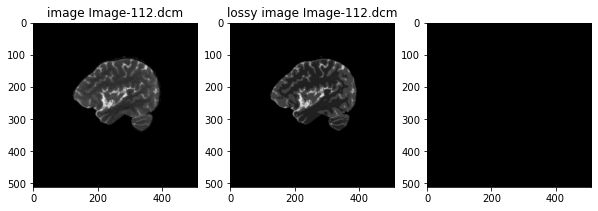

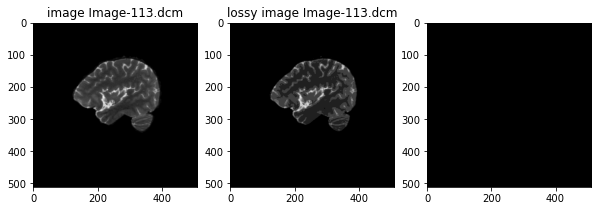

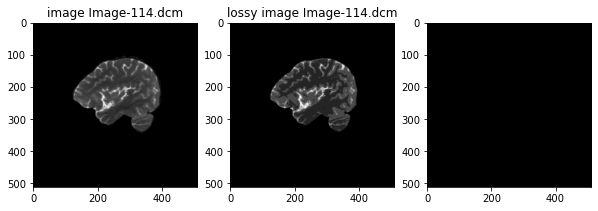

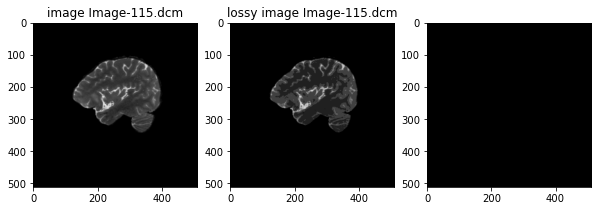

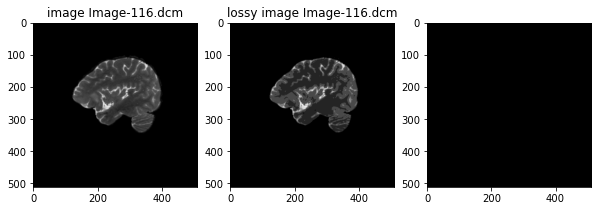

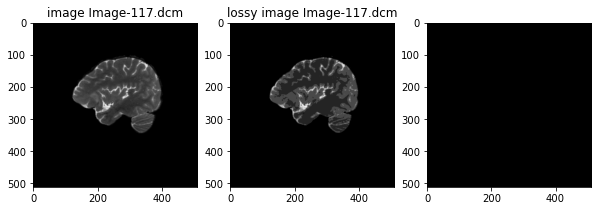

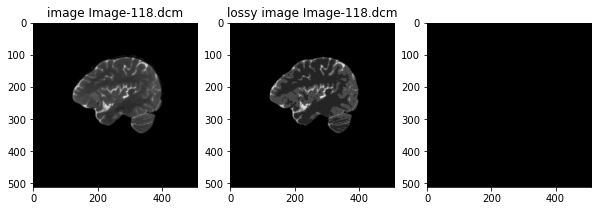

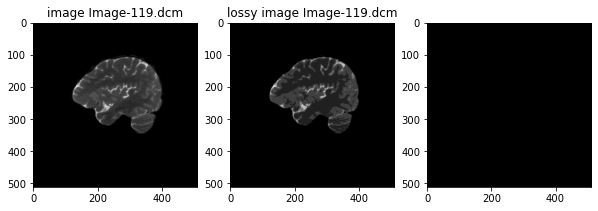

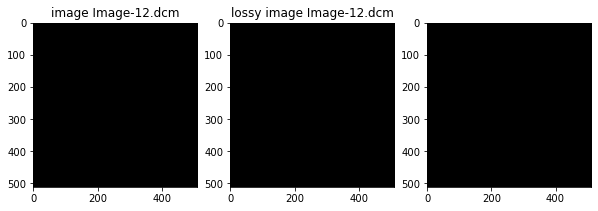

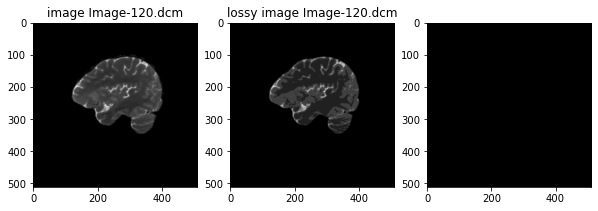

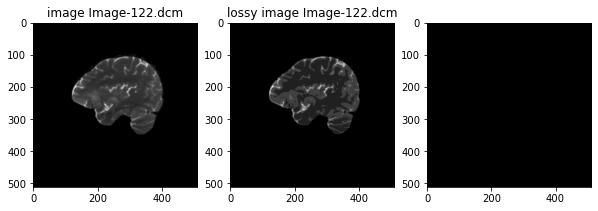

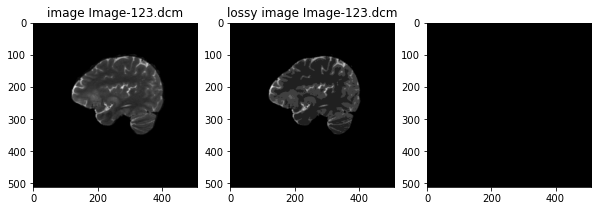

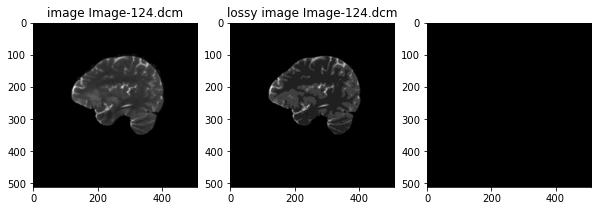

In [15]:
load_images('train/00000/T2w',t2,20)

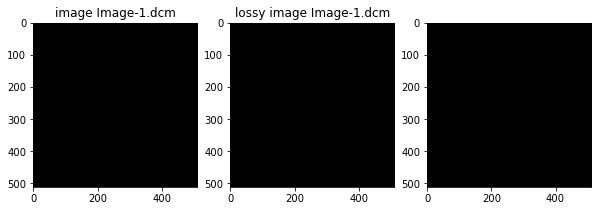

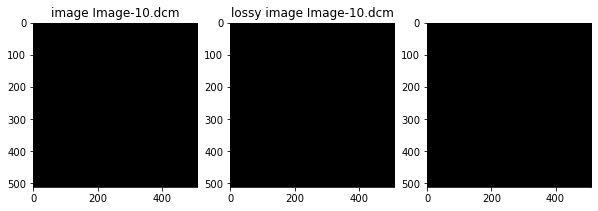

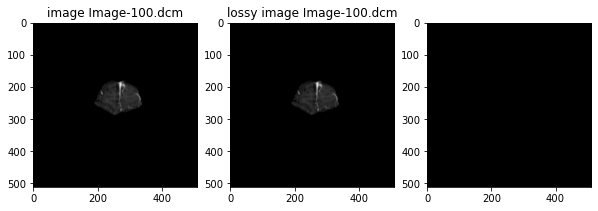

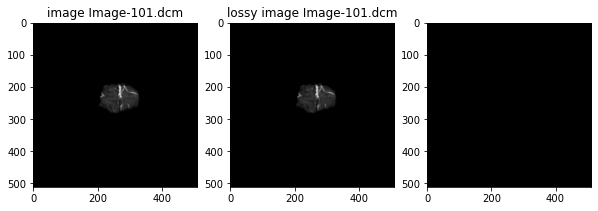

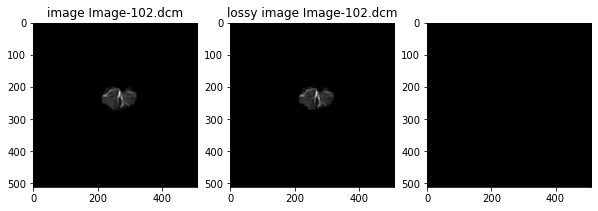

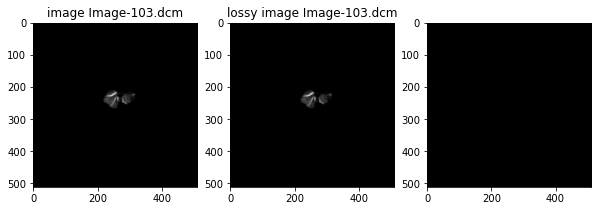

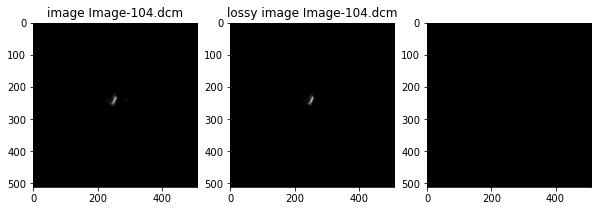

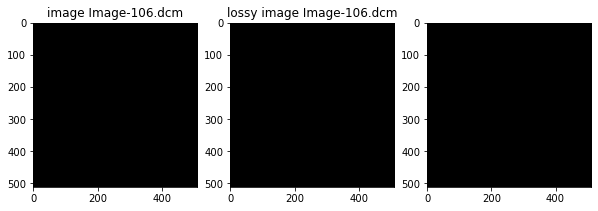

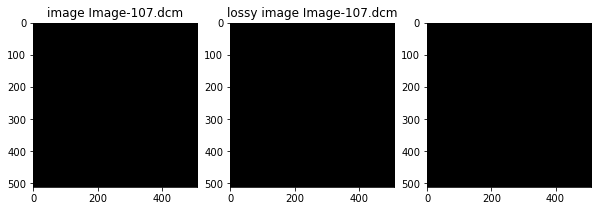

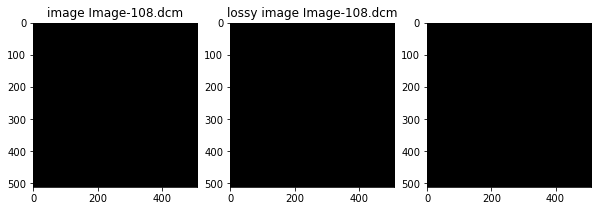

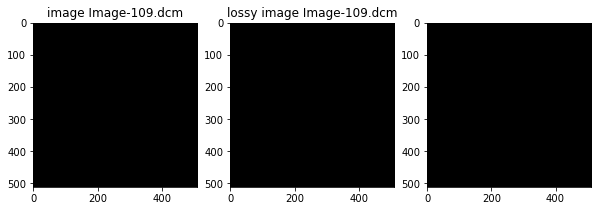

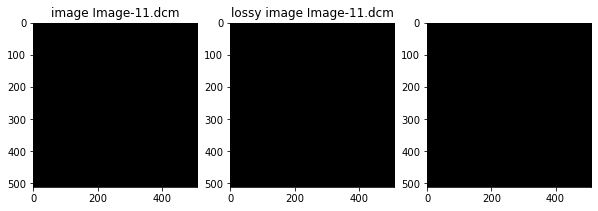

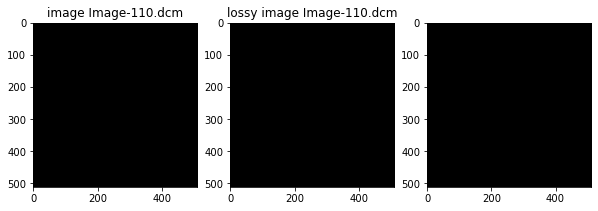

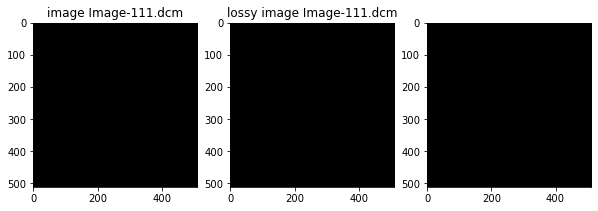

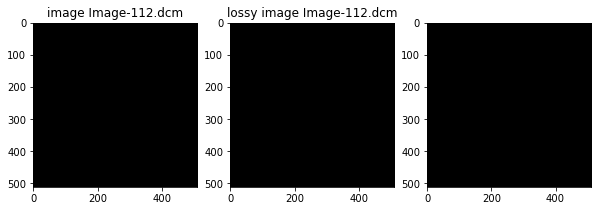

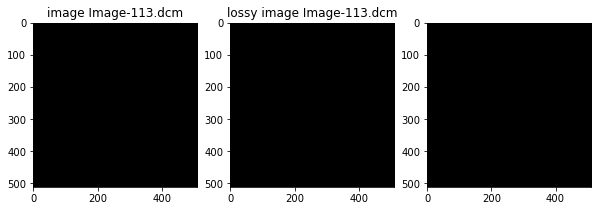

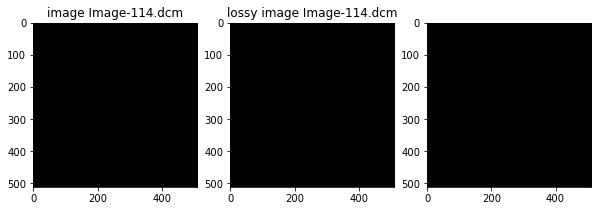

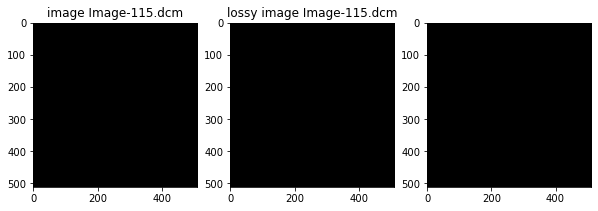

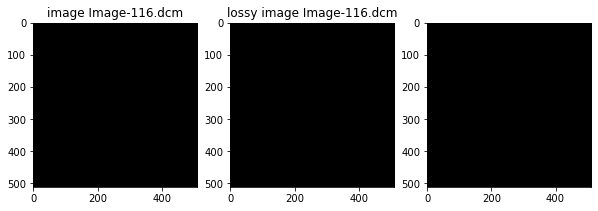

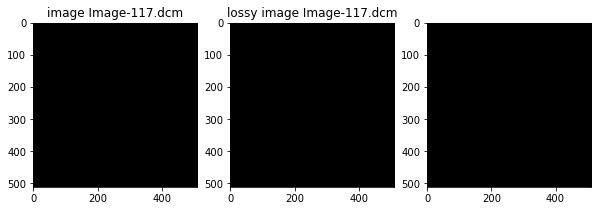

In [16]:
load_images('train/00000/T1wCE',tc,len(tc))

# PyTorch

In [40]:
!pip3 install http://download.pytorch.org/whl/cu80/torch-0.4.0-cp36-cp36m-linux_x86_64.whl 
!pip3 install torchvision
!pip install medicaltorch
!pip3 install numpy==1.14.1

ERROR: torch-0.4.0-cp36-cp36m-linux_x86_64.whl is not a supported wheel on this platform.
  Using cached torchvision-0.11.1-cp38-cp38-manylinux1_x86_64.whl (23.3 MB)
     |█                               | 29.9 MB 73 kB/s eta 3:12:374:16:22ERROR: Exception:
Traceback (most recent call last):
  File "/home/ahmed/anaconda3/lib/python3.8/site-packages/pip/_vendor/urllib3/response.py", line 437, in _error_catcher
    yield
  File "/home/ahmed/anaconda3/lib/python3.8/site-packages/pip/_vendor/urllib3/response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "/home/ahmed/anaconda3/lib/python3.8/site-packages/pip/_vendor/cachecontrol/filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "/home/ahmed/anaconda3/lib/python3.8/http/client.py", line 458, in read
    n = self.readinto(b)
  File "/home/ahmed/anaconda3/lib/python3.8/http/client.py", line 502, in readinto
    n = self.fp.readinto(b)
  File "/home/ahmed/anaconda3/lib/python3.8/sock

  Using cached numpy-1.14.1.zip (4.9 MB)
  ERROR: Command errored out with exit status 1:
   command: /home/ahmed/anaconda3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-3ei67mqh/numpy/setup.py'"'"'; __file__='"'"'/tmp/pip-install-3ei67mqh/numpy/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-5in_4cua
       cwd: /tmp/pip-install-3ei67mqh/numpy/
  Complete output (4070 lines):
  Running from numpy source directory.
  /tmp/pip-install-3ei67mqh/numpy/numpy/distutils/misc_util.py:464: SyntaxWarning: "is" with a literal. Did you mean "=="?
    return is_string(s) and ('*' in s or '?' is s)
  blas_opt_info:
  blas_mkl_info:
  customize UnixCCompiler
    FOUND:
      libraries = ['mkl_rt', 'pthread']
      library_dirs = ['/home/ahmed/anaconda3/lib']
      define_macros = [('SCIPY_MKL_H', None), 

  ERROR: Command errored out with exit status 1:
   command: /home/ahmed/anaconda3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-3ei67mqh/numpy/setup.py'"'"'; __file__='"'"'/tmp/pip-install-3ei67mqh/numpy/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' clean --all
       cwd: /tmp/pip-install-3ei67mqh/numpy
  Complete output (10 lines):
  Running from numpy source directory.
  
  `setup.py clean` is not supported, use one of the following instead:
  
    - `git clean -xdf` (cleans all files)
    - `git clean -Xdf` (cleans all versioned files, doesn't touch
                        files that aren't checked into the git repo)
  
  Add `--force` to your command to use it anyway if you must (unsupported).
  
  ----------------------------------------
  ERROR: Failed cleaning build dir for numpy
Failed to build numpy
  Attem

# DCIOM TO NIFITI

In [1]:
!pip install dicom2nifti

  Using cached nibabel-3.2.1-py3-none-any.whl (3.3 MB)
     |████████████████████████████████| 2.0 MB 129 kB/s eta 0:00:01
  Created wheel for dicom2nifti: filename=dicom2nifti-2.3.0-py3-none-any.whl size=42933 sha256=ce96d9ec4b39604efc3af69f0e28a9eed91a75881e43cfa80654b6718f2ab37f
  Stored in directory: /home/ahmed/.cache/pip/wheels/8f/bb/8f/084918b342d2616c5fc804ec689dac30273c9d11d6aa30f689
Successfully built dicom2nifti


In [8]:
import dicom2nifti

In [13]:
dicom2nifti.convert_directory('train/00000/FLAIR/','../i.nii')

Traceback (most recent call last):
  File "/home/ahmed/anaconda3/lib/python3.8/site-packages/dicom2nifti/convert_dir.py", line 87, in convert_directory
    convert_dicom.dicom_array_to_nifti(dicom_input, nifti_file, reorient)
  File "/home/ahmed/anaconda3/lib/python3.8/site-packages/dicom2nifti/convert_dicom.py", line 118, in dicom_array_to_nifti
    results = convert_generic.dicom_to_nifti(dicom_list, output_file)
  File "/home/ahmed/anaconda3/lib/python3.8/site-packages/dicom2nifti/convert_generic.py", line 98, in dicom_to_nifti
    nii_image.to_filename(output_file)
  File "/home/ahmed/anaconda3/lib/python3.8/site-packages/nibabel/filebasedimages.py", line 333, in to_filename
    self.to_file_map()
  File "/home/ahmed/anaconda3/lib/python3.8/site-packages/nibabel/analyze.py", line 1030, in to_file_map
    hdrf = hdr_fh.get_prepare_fileobj(mode='wb')
  File "/home/ahmed/anaconda3/lib/python3.8/site-packages/nibabel/fileholders.py", line 70, in get_prepare_fileobj
    obj = ImageOpene

In [64]:
dicom2nifti.convert_directory('train/00000/T1wCE/','../testnifti/',compression=False)

In [61]:
!ls

rsna-miccai-brain-tumor-radiogenomic-classification_2.zip  train
sample_submission.csv					   train_labels.csv
test							   Untitled.ipynb


In [17]:
import nibabel as nib
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import skimage, os
from skimage.morphology import ball, disk, dilation, binary_erosion, remove_small_objects, erosion, closing, reconstruction, binary_closing
from skimage.measure import label,regionprops, perimeter
from skimage.morphology import binary_dilation, binary_opening
from skimage.filters import roberts, sobel
from skimage import measure, feature
from skimage.segmentation import clear_border
from skimage import data
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import scipy.misc
import numpy as np
from glob import glob
from skimage.io import imread
BASE_IMG_PATH=os.path.join('..','input')

In [18]:
#glob(os.path.join(BASE_IMG_PATH,'3d_images','*'))

img = ["../IMG_4_flair.nii.gz",'../tc.nii.gz']

In [19]:
mask = [x.replace('IMG_', 'MASK_') for x in img]
print(len(img),' matching files found:',img[0], mask[0])

2  matching files found: ../IMG_4_flair.nii.gz ../MASK_4_flair.nii.gz


In [20]:
# get all nifti files 
for i in train:
    

SyntaxError: unexpected EOF while parsing (58732631.py, line 3)

In [21]:
def display_nifti(patient , scan):

    
    nift_scan=os.listdir('../nifti-tumors/train/'+patient +'/'+scan + '/' )
    test_image=nib.load('../nifti-tumors/train/'+patient +'/' +scan + '/' +nift_scan[0]).get_data()
    #test_mask=nib.load(mask[0]).get_data()
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12, 6))
    ax1.imshow(test_image[test_image.shape[0]//2])
    ax1.set_title('Image')
    #ax2.imshow(test_mask[test_image.shape[0]//2])
    #ax2.set_title('Mask')

In [22]:
nifti_train = os.listdir('../nifti-tumors/train/')


/tmp/ipykernel_4197/2641977658.py:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  test_image=nib.load('../nifti-tumors/train/'+patient +'/' +scan + '/' +nift_scan[0]).get_data()


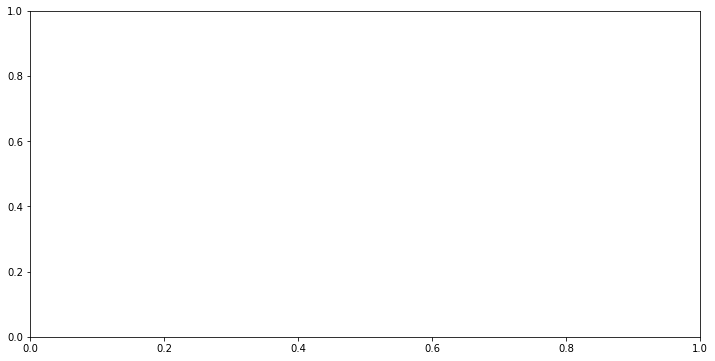

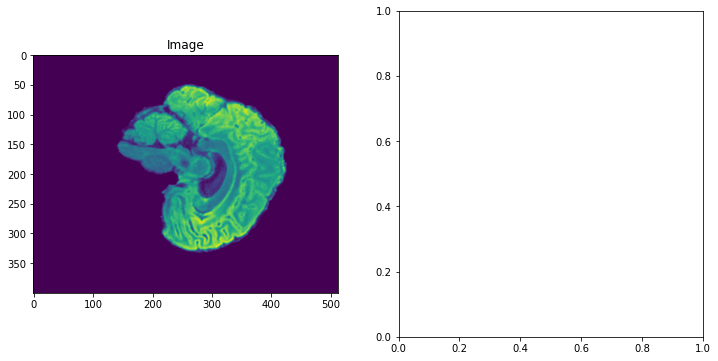

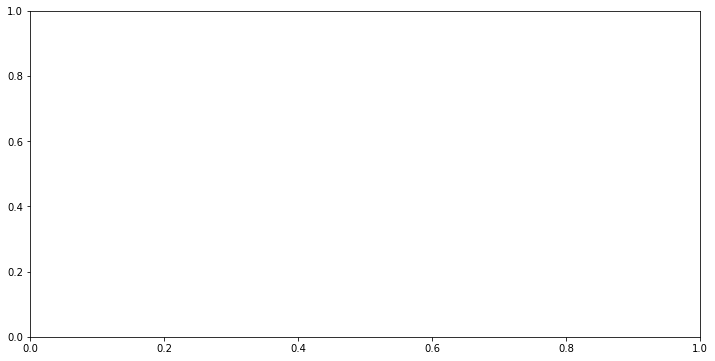

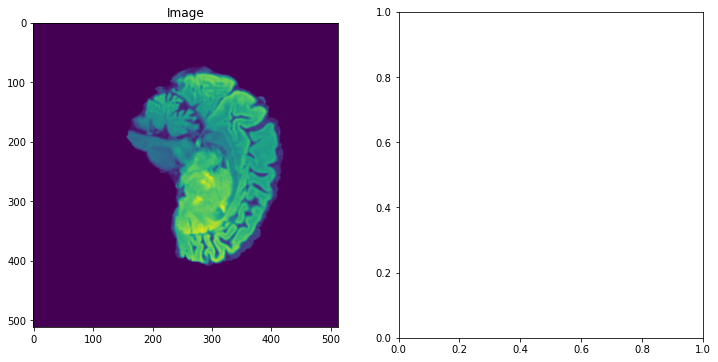

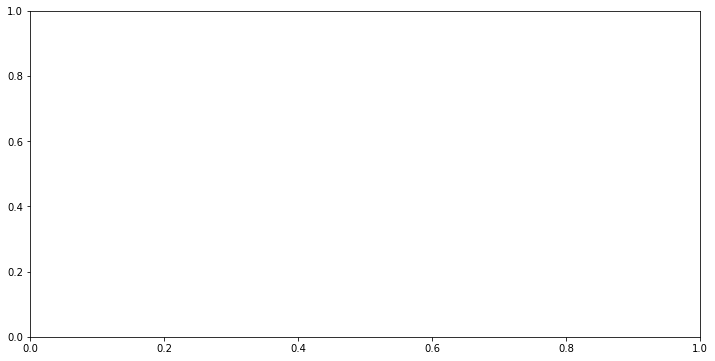

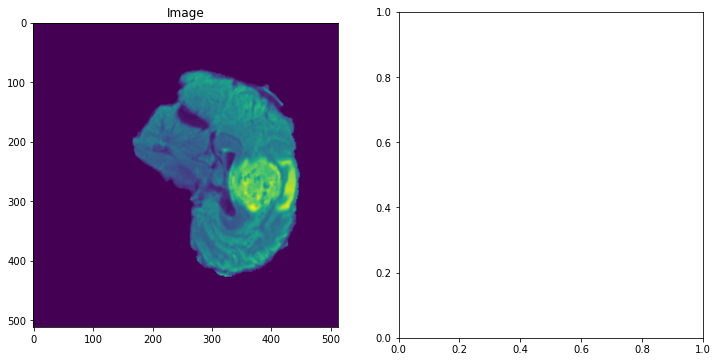

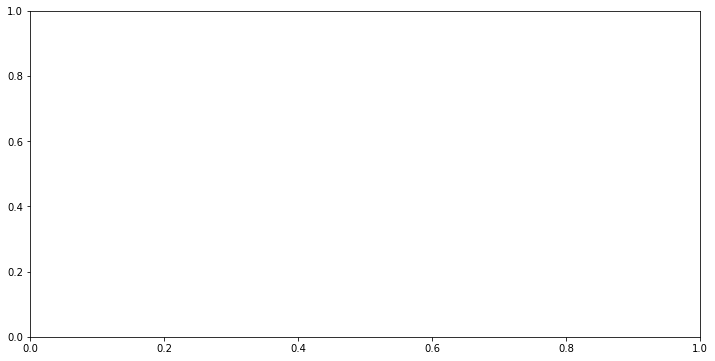

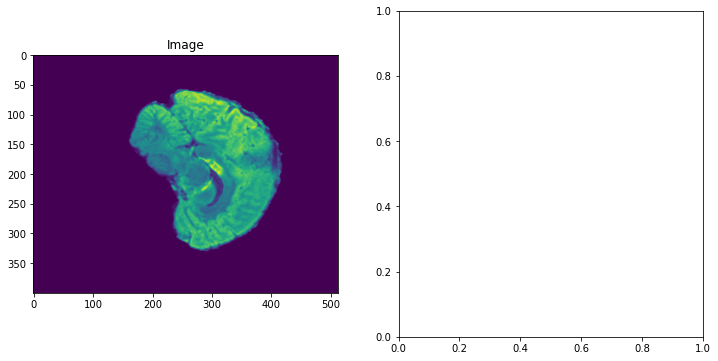

In [23]:
for i in nifti_train:
    fig = plt.subplots( figsize = (12, 6))
   
    #ax1.set_title('Image')
    display_nifti(i,"FLAIR")

# convert dicom images to nifti

In [72]:
scans = ["FLAIR", "T1w","T1wCE","T2w"]

In [10]:
#convert to nifti 


for i in train[:4]:
    os.mkdir('../nifti-tumors/train/' + i)
    for j in scans:d
        os.mkdir('../nifti-tumors/train/' + i + '/' + j)
        dicom2nifti.convert_directory('train/' + i + '/' + j + '/' , '../nifti-tumors/train/' + i + '/' + j + '/')

FileExistsError: [Errno 17] File exists: '../nifti-tumors/train/00000'

In [74]:
train[:3]

['00000', '00002', '00003']

In [16]:
test_image.shape

(129, 512, 512)

In [19]:
oo=os.walk("../nifti-tumors/", topdown=False)

In [27]:
for root, dirs, files in os.walk("../nifti-tumors/", topdown=False):
   for name in files:
      print(root,"  ", dirs,"  ",name)
  

../nifti-tumors/train/00000/FLAIR    []    4_flair.nii.gz
../nifti-tumors/train/00000/T1w    []    8_t1w.nii.gz
../nifti-tumors/train/00000/T1wCE    []    1001_t1wce.nii.gz
../nifti-tumors/train/00000/T2w    []    5_t2w.nii.gz
../nifti-tumors/train/00002/FLAIR    []    401_flair.nii.gz
../nifti-tumors/train/00002/T1w    []    9_t1w.nii.gz
../nifti-tumors/train/00002/T1wCE    []    1001_t1wce.nii.gz
../nifti-tumors/train/00002/T2w    []    5_t2w.nii.gz
../nifti-tumors/train/00003/FLAIR    []    401_flair.nii.gz
../nifti-tumors/train/00003/T1w    []    9_t1w.nii.gz
../nifti-tumors/train/00003/T1wCE    []    1001_t1wce.nii.gz
../nifti-tumors/train/00003/T2w    []    5_t2w.nii.gz
../nifti-tumors/train/00005/FLAIR    []    4_flair.nii.gz
../nifti-tumors/train/00005/T1w    []    9_t1w.nii.gz
../nifti-tumors/train/00005/T1wCE    []    1001_t1wce.nii.gz
../nifti-tumors/train/00005/T2w    []    5_t2w.nii.gz
